데이터 로드 및 확인

In [1]:
import pandas as pd

data = pd.read_csv('./data/final_data_after_winsorization.csv', index_col='행정동명')
data.fillna(0, inplace=True)
print(f"파생변수 생성 및 윈저라이즈 적용 이후 컬럼 수: {data.shape[1]}개")

파생변수 생성 및 윈저라이즈 적용 이후 컬럼 수: 63개


In [2]:
features = ['미세먼지지수',  '공원수', '도시농업(프로그램수)','거주_유동_인구당_매출액', '채소가게수', '제로웨이스트 가게수', '승하차인원_버스_지하철', '카페수', '유치원_초등학교', '인구수', '총_10대','총_20_30대', '총_60대이상', '1인세대']
data = data[features]
print(f'feature selection 이후, 사용하는 컬럼 수: {len(features)}개')

feature selection 이후, 사용하는 컬럼 수: 14개


## min_max scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(data))
scaled_df.index = data.index
scaled_df.columns = data.columns
print(f'스케일 이후 shape: {scaled_df.shape[0]}행, {scaled_df.shape[1]}열')
scaled_df.head(2)

스케일 이후 shape: 426행, 14열


,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대
행정동명,,,,,,,,,,,,,,
가락1동,0.014204,0.076923,0.0,0.025989,0.116279,0.0,0.085682,0.105911,0.125300,0.639775,0.426207,0.408414,0.457904,0.112284
가락2동,0.014204,0.346154,0.0,0.035016,0.034884,0.0,0.088504,0.182266,0.220257,0.745585,0.466991,0.415310,0.489702,0.269226


## PCA

- 총 주성분의 누적 설명력을 지정해서 결정하기

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.80)
pca.fit(scaled_df)
pca_result = pd.DataFrame((pca.transform(scaled_df)))

num_of_principal = pca_result.shape[1] 
print('<주성분 설명력>')

for i in range(num_of_principal) :
    print(f"제 {i+1}주성분 :", pca.explained_variance_ratio_[i])

print(f'\n주성분의 개수:\t{num_of_principal}개')
print(f'PCA 이후 shape:\t{pca_result.shape[0]}행, {pca_result.shape[1]}열')
pca_result.index = data.index
pca_result.head(2)

<주성분 설명력>
제 1주성분 : 0.3031472103177469
제 2주성분 : 0.24872724867827828
제 3주성분 : 0.11136909342828541
제 4주성분 : 0.07746296789446064
제 5주성분 : 0.057122236866911584
제 6주성분 : 0.04575500769808147

주성분의 개수:	6개
PCA 이후 shape:	426행, 6열


,0,1,2,3,4,5
행정동명,,,,,,
가락1동,0.313751,-0.194982,-0.059432,-0.178299,0.034524,-0.083174
가락2동,0.416137,-0.051024,0.035967,-0.002984,-0.078425,0.073808


- scree plot 으로 주성분 수 결정하기

In [20]:
# 시각화 스타일 바꾸기
plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

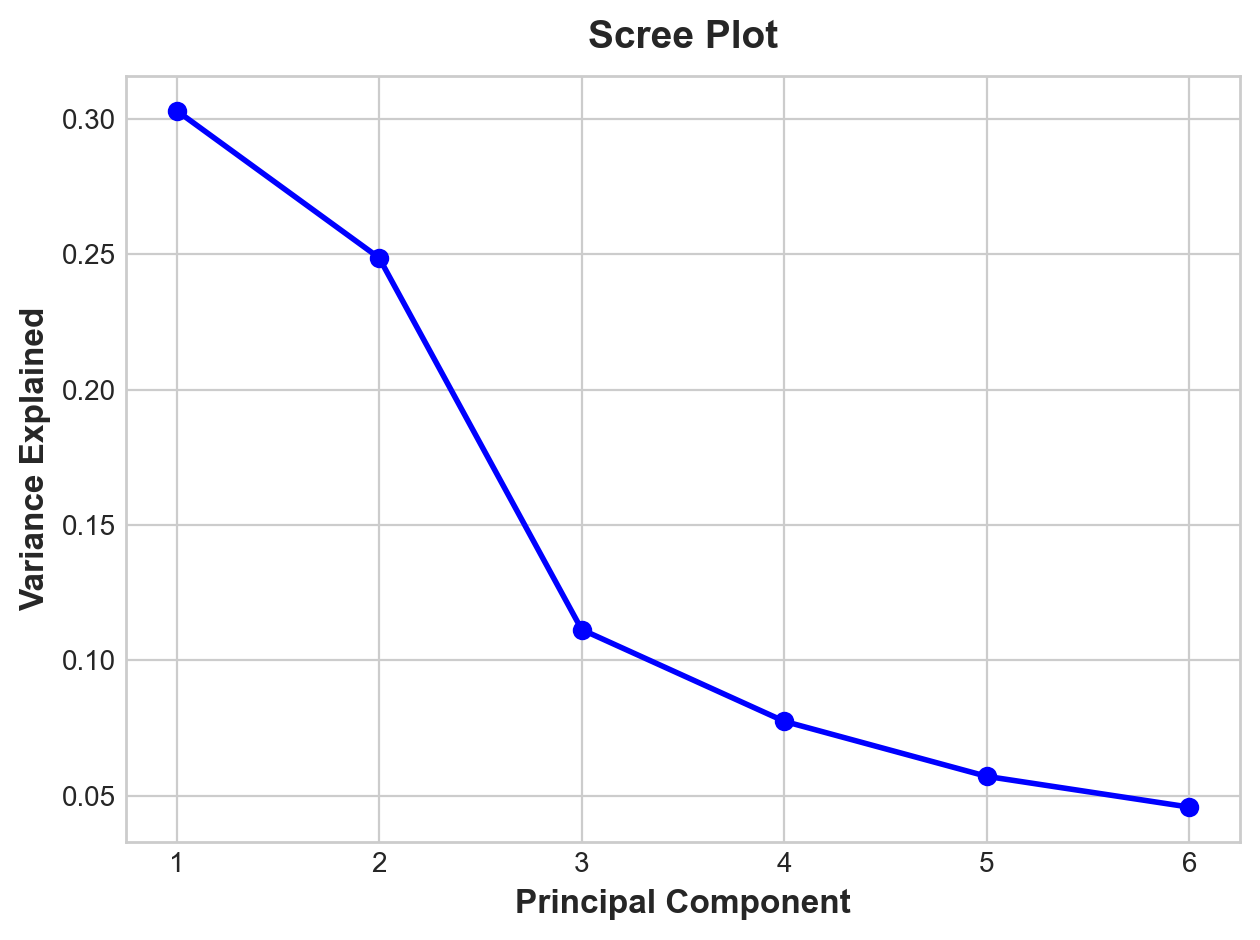

In [18]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
pca_result.to_csv('./data/minmax_scaling_PCA.csv')

- PCA interpretation

In [27]:
# 폰트 깨짐 바로잡기
import os

# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

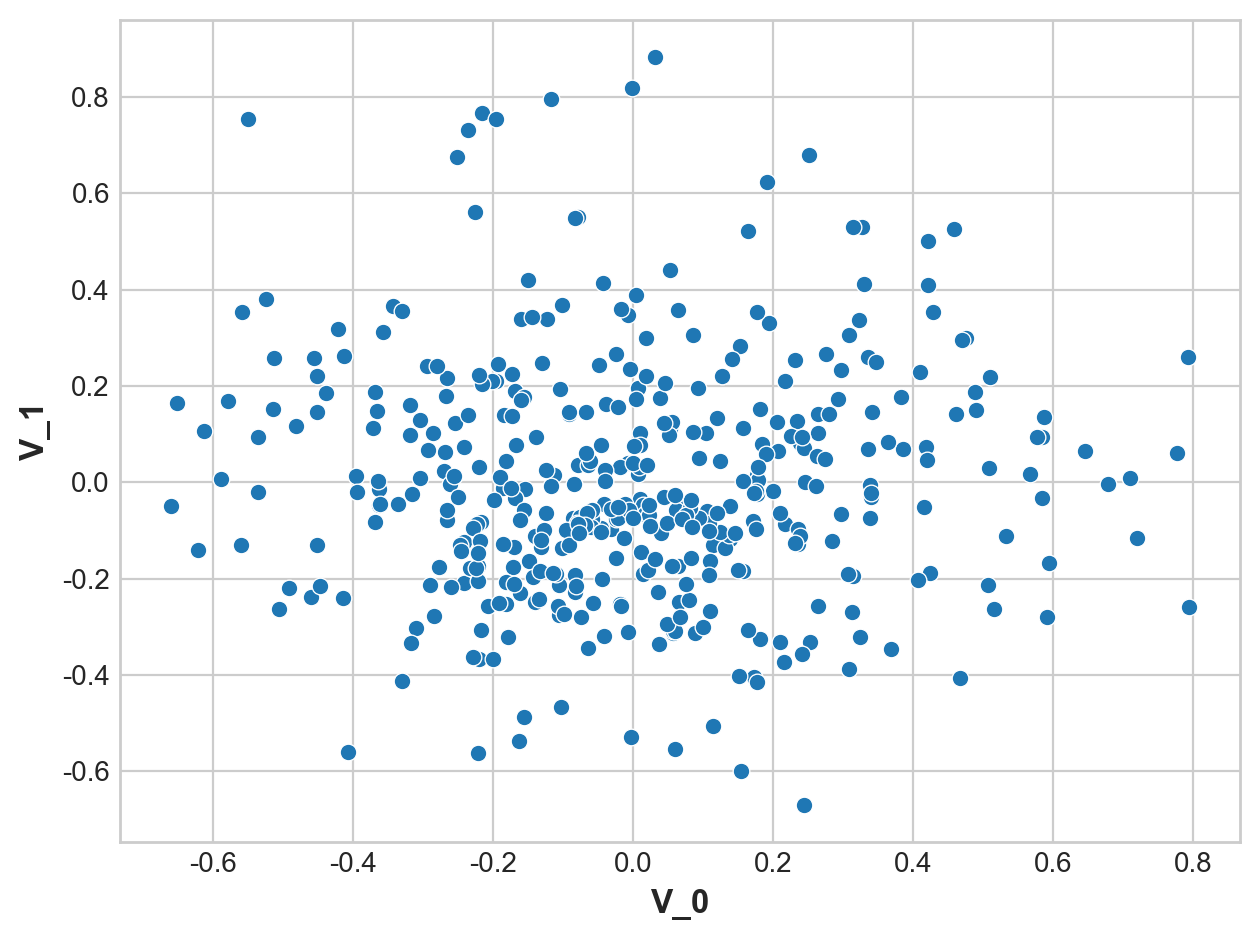

In [19]:
import seaborn as sns

pca_to_plot = pca_result.copy()
pca_to_plot.columns = ['V_' + str(x) for x in pca_to_plot.columns]
sns.scatterplot(data = pca_to_plot, x = 'V_0', y = 'V_1')
plt.show()

In [16]:
print(pca_to_plot.sort_values('V_0').head(5))
print(pca_to_plot.sort_values('V_0').tail(5))
print(pca_to_plot.sort_values('V_1').head(5))
print(pca_to_plot.sort_values('V_1').tail(5))

           V_0       V_1       V_2       V_3       V_4       V_5
행정동명                                                            
필동   -0.660355 -0.048411  0.392070  0.419604 -0.405873 -0.258607
을지로동 -0.651767  0.163756  0.220484 -0.109212 -0.054113  0.107380
둔촌1동 -0.621720 -0.141444  0.188045 -0.126260 -0.362875  0.062102
가리봉동 -0.612605  0.107408 -0.156476  0.051506 -0.025351 -0.021620
장충동  -0.588089  0.006152  0.046064  0.049316 -0.261756 -0.098729
           V_0       V_1       V_2       V_3       V_4       V_5
행정동명                                                            
신정3동  0.710345  0.008414  0.075882  0.230704 -0.110123  0.055720
위례동   0.719739 -0.116289  0.153284 -0.205296 -0.109415 -0.144933
진관동   0.776705  0.060339  0.292117  0.258947 -0.075628  0.045717
양재1동  0.793389  0.260735  0.365653  0.408048 -0.068085  0.375711
목5동   0.794465 -0.258356  0.223936 -0.020476 -0.151098 -0.074822
           V_0       V_1       V_2       V_3       V_4       V_5
행정동명                     

loading matrix 생성

In [24]:
## 방법 1 
# pd.DataFrame(data=pca.components_, columns=scaled_df.columns).T #아래 코드와 동일한 결과 산출

## 방법 2
# loadings = pd.DataFrame(pca.components_.T, columns=[f"PC{i}" for i in range(1, num_of_principal+1)], index=data.columns)

## 방법 3
tmp = pca.components_
num_pc = pca.n_features_in_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, tmp)))
loadings_df['variable'] = data.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6
variable,,,,,,
미세먼지지수,-0.080590,0.094684,0.296722,0.087117,0.180117,-0.035903
공원수,0.271876,0.090130,0.215702,0.394975,-0.108064,0.799328
도시농업(프로그램수),0.001329,0.056105,0.146875,0.132258,0.185270,-0.040614
거주_유동_인구당_매출액,-0.110020,-0.060351,0.260936,-0.199340,-0.162421,0.239050
채소가게수,0.009614,0.053731,-0.037048,0.054166,0.052658,-0.034021
제로웨이스트 가게수,-0.008139,0.057883,0.131611,0.039677,0.107375,0.069813
승하차인원_버스_지하철,0.082841,0.304039,0.417959,0.065134,0.371241,-0.275890
카페수,0.026723,0.285493,0.453133,-0.073693,0.211609,-0.044682
유치원_초등학교,-0.094357,-0.190817,0.346881,0.567748,-0.588320,-0.394278


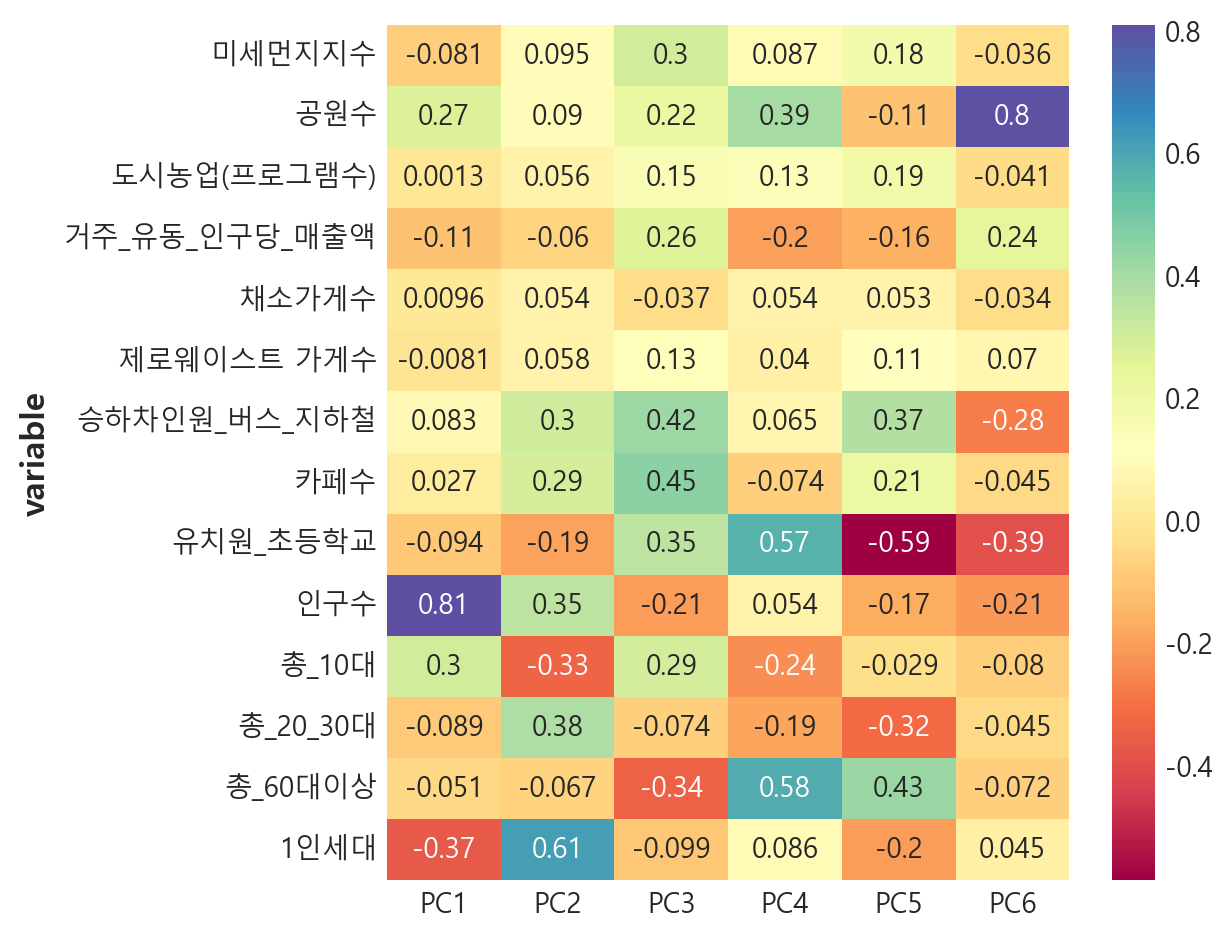

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()